In [1]:
import numpy as np
import gudhi
import mdtraj as md
import seaborn as sns
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
traj = md.load_dcd('deca56D_prd.dcd', top='deca56D_clean.pdb')
traj = md.Trajectory.superpose(traj, traj[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

traj3 = md.load('bottleneck_selected_trajectory.pdb')
traj3 = md.Trajectory.superpose(traj3, traj3[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

rmsd = md.rmsd(traj3, traj3[0], frame=0, atom_indices=None, parallel=True, precentered=False)*10

np.save('BottleneckRMSD.npy',rmsd)

In [ ]:
from pylab import *
from math import pi
time_steps = np.arange(0, 200)

fig, ax = plt.subplots(figsize=(12,6))
inty_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0,
                            0.15, ax.get_position().height])

ax.plot(time_steps, rmsd, marker='o', markersize=0, linestyle='-', lw=3)
ax.set_xlabel('Time Steps [ps]', fontsize = 15)
ax.set_ylabel('RMSD Value [Å]', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.kdeplot(y = rmsd, ax = inty_ax, lw=3)
inty_ax.set_xlabel('Density', fontsize=15)
inty_ax.tick_params(labelleft = False, labelsize = 15)

fig.suptitle('56D-decapeptide RMSD', fontsize = 20)
plot_filename = f'selected frame RMSD.png'
plt.savefig(plot_filename, bbox_inches='tight', dpi=900)
plt.show()

subset_traj = traj[1642600:1642700]
subset_traj.save('bsheetbottleframes.pdb')

subset_traj = traj[100100:100200]
subset_traj.save('bsheetbottleframes.pdb')

num_frames = min(traj.n_frames, 1400000)

selected_frames = range(0, num_frames, 7000)
selected_traj = traj[selected_frames]

# Save the selected trajectories into a new PDB file
selected_traj.save_pdb('bottleneck_selected_trajectory.pdb')

In [3]:
atomic_coordinates = traj.xyz

In [4]:
for frame in range(traj.n_frames):
    atomic_coordinates = traj.xyz[frame]

In [5]:
frame2 = traj.xyz[0]

In [34]:
frame5 = traj.xyz[1, carbon_atoms, :]

In [6]:
carbon_atoms = traj.topology.select("element == 'C'")

In [7]:
frame1 = traj.xyz[0, carbon_atoms, :]

In [8]:
num_rows = np.size(frame1, axis=0)
print(f"Number of rows: {num_rows}")

Number of rows: 60


In [9]:
num_rows = np.size(frame2, axis=0)
print(f"Number of rows: {num_rows}")

Number of rows: 193


In [24]:
frame3 = traj.xyz[1642600, carbon_atoms, :]
frame4 = traj.xyz[1642600]

In [41]:
rips_complex = gudhi.RipsComplex(points=frame3)

In [42]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

In [43]:
persistence = simplex_tree.persistence()

In [20]:
alpha_complex = {tuple(sorted(simplex)) : radius for simplex, radius in simplex_tree.get_filtration()}
boundary_matrix = {simplex : set(itertools.combinations(simplex, len(simplex)-1))-{tuple()} for simplex in alpha_complex}

R = { k : v for k,v in boundary_matrix.items()}
V = { k : {k} for k in boundary_matrix}
lowinv = {} # lowinv[i]=index of column with the lowest 1 at i
order_function = lambda s: (alpha_complex[s], s)
for s in sorted(R, key=order_function):
    t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    while t!=-1:
        R[s] = R[t]^R[s] # symmetric difference of t-th and s-th columns
        V[s] = V[t]^V[s]
        t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    if len(R[s])!=0:
        lowinv[max(R[s], key=order_function)] = s

loops = [bar for bar in lowinv.items() if len(bar[0])==2]
longest_loop = max(loops, key=lambda bar: alpha_complex[bar[1]]-alpha_complex[bar[0]])
representative_1 = R[longest_loop[1]]
representative_2 = V[longest_loop[0]]
#for edge in representative_1:
    #plt.plot( *zip(frame1[edge[0]], frame1[edge[1]]), '-', color='blue', alpha=.6 )
#for edge in representative_2:
 #   plt.plot( *zip(frame1[edge[0]], frame1[edge[1]]), '--', color='red', alpha=.6 )
#plt.plot(*zip(*frame1),'o')
#plt.show()

In [19]:
print(representative_1)
print(representative_2)

{(26, 27), (25, 30), (42, 46), (36, 37), (37, 42), (27, 46), (30, 36), (25, 26)}
{(37, 42), (45, 46), (27, 46), (44, 45), (26, 27), (24, 26), (31, 36), (42, 44), (24, 25), (30, 31), (25, 30), (36, 37)}


In [42]:
carbon_atoms[37]

120

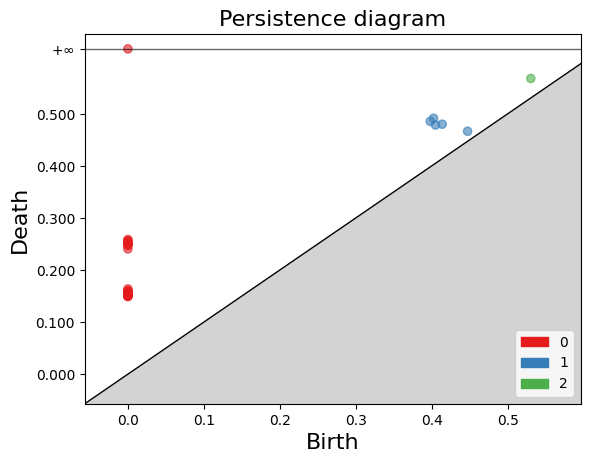

In [44]:
import matplotlib.pyplot as plt
gudhi.plot_persistence_diagram(persistence)
plot_filename = f'diagram frame1642601'
plt.savefig(plot_filename, bbox_inches='tight',dpi=600)

gudhi.plot_persistence_barcode(persistence)

In [45]:
persistence

[(2, (0.5304501285961422, 0.5678649646509779)),
 (1, (0.40241580221398454, 0.4914595951168633)),
 (1, (0.39804258888197697, 0.48552120575566327)),
 (1, (0.4049639515524542, 0.4784307173055916)),
 (1, (0.41383397006256345, 0.4801002382433863)),
 (1, (0.44720422692470496, 0.46649776049012825)),
 (0, (0.0, inf)),
 (0, (0.0, 0.25844251566381743)),
 (0, (0.0, 0.2562784339795375)),
 (0, (0.0, 0.25359283684545153)),
 (0, (0.0, 0.253148149057761)),
 (0, (0.0, 0.25000118918912256)),
 (0, (0.0, 0.24918884671556993)),
 (0, (0.0, 0.24846124107501635)),
 (0, (0.0, 0.24753518218101278)),
 (0, (0.0, 0.2406409133924844)),
 (0, (0.0, 0.16363489270656223)),
 (0, (0.0, 0.159641817700669)),
 (0, (0.0, 0.15949909916539565)),
 (0, (0.0, 0.15759391418502794)),
 (0, (0.0, 0.1575508006829802)),
 (0, (0.0, 0.15726810003560512)),
 (0, (0.0, 0.15720320046102676)),
 (0, (0.0, 0.15616418646908634)),
 (0, (0.0, 0.15609570296816916)),
 (0, (0.0, 0.155994322348912)),
 (0, (0.0, 0.15594254974258015)),
 (0, (0.0, 0.1557

In [46]:
# Specify the birth and death times of interest
birth_time = 0
death_time = 0.25844251566381743

# Find simplices contributing to the birth
birth_simplices = [simplex for simplex, time in simplex_tree.get_simplices() if time == birth_time]

# Find simplices contributing to the death
death_simplices = [simplex for simplex, time in simplex_tree.get_simplices() if time == death_time]
print("Simplices contributing to birth at time", birth_time, ":", birth_simplices)
print("Simplices contributing to death at time", death_time, ":", death_simplices)

Simplices contributing to birth at time 0 : [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59]]
Simplices contributing to death at time 0.25844251566381743 : [[37, 42]]


In [52]:
import numpy as np

# Assuming you have a NumPy array of 193 atoms called all_atoms_array
all_atoms_array = np.array(traj.xyz[1642600])  # Your actual array goes here

# Assuming you have a NumPy array of 60 carbon atoms called carbon_atoms_array
carbon_atoms_array = np.array(traj.xyz[1642600, carbon_atoms, :])  # Your actual array goes here

# Index number of the specific carbon atom in the carbon_atoms_array
specific_carbon_index_in_new_array = 37  # Replace with the actual index you have

# Get the label or identifier of the specific carbon atom in the new array
specific_carbon_atom_label = carbon_atoms_array[specific_carbon_index_in_new_array]

# Find the index of this atom in the original array
index_in_original_array = np.where(all_atoms_array == specific_carbon_atom_label)[0][0]

print(f"The index number of the specific carbon atom in the original array is: {index_in_original_array}")

The index number of the specific carbon atom in the original array is: 120


first_frame = traj[0]
first_frame.save("first_frame_output.pdb")

In [ ]:
b_sheet = traj[1642600]
b_sheet.save("bsheet_frame_output.pdb")

In [3]:
frame = traj[0:100]
frame.save("normal100frame.pdb")

In [3]:
frame = traj[30:40]
frame.save("normal10frame.pdb")

In [4]:
a_helix = traj[1642550:1642650]
a_helix.save("bhairpin100frame.pdb")

In [4]:
a_helix = traj[1642610:1642620]
a_helix.save("bhairpin10frame.pdb")

In [5]:
traj5 = md.load('normal100frame.pdb')
traj5 = md.Trajectory.superpose(traj5, traj5[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [11]:
traj6 = md.load('bhairpin100frame.pdb')
traj6 = md.Trajectory.superpose(traj6, traj6[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)